# F1 statistics & simulation
\[_In case you’re unable to see the atoti visualizations in GitHub, try viewing the notebook in [nbviewer](https://nbviewer.org/github/atoti/notebooks/blob/main/notebooks/01-use-cases/other-industries/formula-one/main.ipynb)._]

## Introduction

Credit:
The original version of this notebook was created by David Chevrier, Diggers.

More information: https://www.diggers-consulting.com/blog/articles/how-data-science-could-turn-felipe-massa-a-f1-world-champion

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=formula-one" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/discover.png" alt="Try atoti"></a></div>

## Dataset
Data from https://ergast.com/mrd/db/#csv
F1 data from 1950 to 2019

## Initialization & creation of the atoti session

In [1]:
import atoti as tt
import numpy as np
import pandas as pd

session = tt.Session()

## Creation of the stores

In [2]:
drivers_df = pd.read_csv(
    "https://data.atoti.io/notebooks/formula-one/drivers.csv", encoding="latin-1"
)
drivers_df.rename(columns={"url": "driver_url"}, inplace=True)
drivers_df.rename(columns={"nationality": "driver_nationality"}, inplace=True)

drivers_table = session.read_pandas(
    drivers_df, keys=["driverId"], table_name="F1 drivers"
)

In [3]:
drivers_table.head()

,driverRef,number,code,forename,surname,dob,driver_nationality,driver_url
driverId,,,,,,,,
19,davidson,\N,DAV,Anthony,Davidson,1979-04-18,British,http://en.wikipedia.org/wiki/Anthony_Davidson
39,karthikeyan,\N,KAR,Narain,Karthikeyan,1977-01-14,Indian,http://en.wikipedia.org/wiki/Narain_Karthikeyan
59,bernoldi,\N,\N,Enrique,Bernoldi,1978-10-19,Brazilian,http://en.wikipedia.org/wiki/Enrique_Bernoldi
79,katayama,\N,\N,Ukyo,Katayama,1963-05-29,Japanese,http://en.wikipedia.org/wiki/Ukyo_Katayama
99,tarquini,\N,\N,Gabriele,Tarquini,1962-03-02,Italian,http://en.wikipedia.org/wiki/Gabriele_Tarquini


In [4]:
races_df = pd.read_csv(
    "https://data.atoti.io/notebooks/formula-one/races.csv", encoding="latin-1"
)
races_df.rename(columns={"url": "race_url"}, inplace=True)
races_df.rename(columns={"name": "race_name"}, inplace=True)
races_df["year"] = races_df["year"].astype("str")

# by setting year as key, it will be converted into hierarchy
races_table = session.read_pandas(
    races_df,
    keys=["raceId", "year"],
    table_name="F1 races",
)

In [5]:
races_table.head()

,,round,circuitId,race_name,date,time,race_url
raceId,year,,,,,,
1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...
24,2008,7,7,Canadian Grand Prix,2008-06-08,17:00:00,http://en.wikipedia.org/wiki/2008_Canadian_Gra...
101,2004,12,10,German Grand Prix,2004-07-25,\N,http://en.wikipedia.org/wiki/2004_German_Grand...


In [6]:
constructors_df = pd.read_csv(
    "https://data.atoti.io/notebooks/formula-one/constructors.csv", encoding="latin-1"
)
constructors_df.rename(columns={"url": "constructor_url"}, inplace=True)
constructors_df.rename(columns={"name": "constructor_name"}, inplace=True)
constructors_df.rename(columns={"nationality": "constructor_nationality"}, inplace=True)

constructors_table = session.read_pandas(
    constructors_df,
    keys=["constructorId"],
    table_name="F1 constructors",
)

In [7]:
constructors_table.head()

,constructorRef,constructor_name,constructor_nationality,constructor_url
constructorId,,,,
19,jaguar,Jaguar,British,http://en.wikipedia.org/wiki/Jaguar_Racing
39,ags,AGS,French,http://en.wikipedia.org/wiki/Automobiles_Gonfa...
60,merzario,Merzario,Italian,http://en.wikipedia.org/wiki/Merzario
80,iso_marlboro,Iso Marlboro,British,http://en.wikipedia.org/wiki/Iso_Marlboro
100,enb,ENB,Belgium,http://en.wikipedia.org/wiki/Ecurie_Nationale_...


In [8]:
results_df = pd.read_csv("https://data.atoti.io/notebooks/formula-one/results.csv")
results_df.loc[results_df["fastestLapSpeed"] == "\\N", "fastestLapSpeed"] = None
results_df.loc[results_df["position"] == "\\N", "position"] = None
# cast position to numeric
results_df["fastestLapSpeed"] = pd.to_numeric(results_df["fastestLapSpeed"])
results_df["position"] = pd.to_numeric(results_df["position"])

In [9]:
resultsTypes = {
    "points": tt.type.DOUBLE,
    "position": tt.type.INT,
}

results_table = session.read_pandas(
    results_df,
    keys=["resultId", "raceId", "driverId", "constructorId"],
    table_name="F1 results",
    types=resultsTypes,
)

In [10]:
results_table.head()

,,,,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
resultId,raceId,driverId,constructorId,,,,,,,,,,,,,,
1,18,1,1,22,1,1.0,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
20,18,20,5,15,9,NaN,R,20,0.0,0,\N,\N,\N,\N,\N,NaN,4
53,20,10,7,12,13,9.0,9,9,0.0,57,+1:09.500,5536470,56,9,1:34.807,205.503,1
65,20,18,11,16,9,NaN,R,21,0.0,19,\N,\N,11,21,1:36.125,202.686,4
75,21,2,2,3,9,9.0,9,9,0.0,66,+1:03.073,5962124,21,7,1:22.519,203.080,1


In [11]:
results_table.join(drivers_table, mapping={"driverId": "driverId"})
results_table.join(races_table, mapping={"raceId": "raceId"})
results_table.join(constructors_table, mapping={"constructorId": "constructorId"})

## Cube

In [12]:
f1cube = session.create_cube(results_table, "F1Cube")

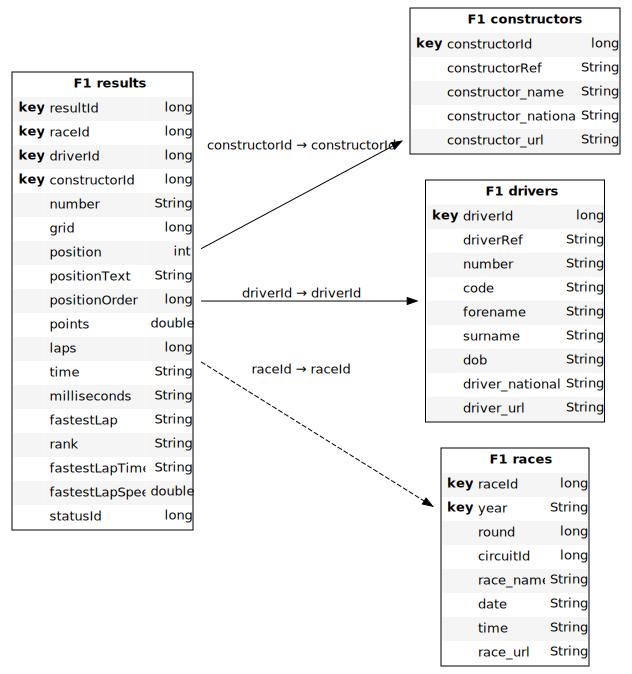

In [13]:
f1cube.schema

In [14]:
h, l, m = f1cube.hierarchies, f1cube.levels, f1cube.measures

## Analysis

### Driver with the most races

Barichello has cumulated more than 326 races over his career!

In [15]:
session.visualize("Total number of races per driver")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Fastest drivers



In [16]:
m["fastestLapSpeed.MIN"] = tt.agg.min(results_table["fastestLapSpeed"])

m["Fastest driver"] = tt.where(
    ~m["fastestLapSpeed.MIN"].isnull(),
    tt.agg.min_member(m["fastestLapSpeed.MIN"], l["driverRef"]),
)

m["Fastest year"] = tt.where(
    ~m["fastestLapSpeed.MIN"].isnull(),
    tt.agg.min_member(m["fastestLapSpeed.MIN"], l["year"]),
)

m["fastestLapSpeed.MIN"].formatter = "DOUBLE[#.000]"
m["Fastest year"].formatter = "DOUBLE[#]"

In [17]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Top driver and constructors

Let's create some measures to return the driver and constructor with the most points.

In [18]:
m["Score"] = m["points.SUM"]
m["Top driver"] = tt.agg.max_member(m["Score"], l["driverRef"])
m["Top constructor"] = tt.agg.max_member(m["Score"], l["constructor_name"])

In [19]:
session.visualize("Top driver and constructor by year")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Lewis Hamilton and it's team Mercedes have been dominating the championship for almost the last 6 years.

Let's compare driver's scores:

In [20]:
session.visualize("Score per drivers")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Hamilton is the driver with the most points ever. However, it's unfair to compare points accross seasons since the scoring systems are not constant and most recent seasons award more points to drivers. This explains why pilots like Hamilton and Vettel have much more points than Schumacher while having ran and scored less races.

### Different scoring systems

Scoring rules for Formula One have [changed over time](https://en.wikipedia.org/wiki/List_of_Formula_One_World_Championship_points_scoring_systems). To make a fair comparison, let's normalize the points across all years by applying a constant scoring across all seasons.

First, we'll determine the maximum position across all seasons:

In [21]:
m["position.MAX"] = tt.agg.max(results_table["position"])

In [22]:
maxPositionDf = f1cube.query(m["position.MAX"])
maxPositionDf

,position.MAX
0,33


This means that there has never been more than 33 drivers in one race. We'll use that information to create a data frame representing the different points awarded by positions across all scoring system:

In [23]:
# index = scoring systen
scoring_systems = [
    "Scoring 1950 to 1953",
    "Scoring 1954 to 1957 & 1959",
    "Scoring 1958",
    "Scoring 1960",
    "Scoring 1961 to 1962 & 1966",
    "Scoring 1963 to 1965",
    "Scoring 1967 & 1969 & 1971",
    "Scoring 1968 & 1972",
    "Scoring 1970",
    "Scoring 1973 to 1974",
    "Scoring 1975",
    "Scoring 1976 & 1978",
    "Scoring 1977",
    "Scoring 1979",
    "Scoring 1980",
    "Scoring 1981 to 1990",
    "Scoring 1991 to 2002",
    "Scoring 2003 to 2009",
    "Scoring 2010 to 2020",
]

In [24]:
scoring_positions = np.arange(1, maxPositionDf["position.MAX"][0] + 1)
# a column for each position
# values = number of points scored for this year's race position
dfscoring = pd.DataFrame(
    0,
    index=scoring_systems,
    columns=scoring_positions,
)

dfscoring.loc["Scoring 1950 to 1953"][1, 2, 3, 4, 5] = [8, 6, 4, 3, 2]
dfscoring.loc["Scoring 1954 to 1957 & 1959"] = dfscoring.loc["Scoring 1950 to 1953"]
dfscoring.loc["Scoring 1958"] = dfscoring.loc["Scoring 1950 to 1953"]

dfscoring.loc["Scoring 1960"][1, 2, 3, 4, 5, 6] = [8, 6, 4, 3, 2, 1]

dfscoring.loc["Scoring 1961 to 1962 & 1966"][1, 2, 3, 4, 5, 6] = [9, 6, 4, 3, 2, 1]
dfscoring.loc["Scoring 1967 & 1969 & 1971"] = dfscoring.loc[
    "Scoring 1961 to 1962 & 1966"
]
dfscoring.loc["Scoring 1968 & 1972"] = dfscoring.loc["Scoring 1961 to 1962 & 1966"]
dfscoring.loc["Scoring 1970"] = dfscoring.loc["Scoring 1961 to 1962 & 1966"]
dfscoring.loc["Scoring 1973 to 1974"] = dfscoring.loc["Scoring 1961 to 1962 & 1966"]
dfscoring.loc["Scoring 1975"] = dfscoring.loc["Scoring 1961 to 1962 & 1966"]
dfscoring.loc["Scoring 1976 & 1978"] = dfscoring.loc["Scoring 1961 to 1962 & 1966"]
dfscoring.loc["Scoring 1977"] = dfscoring.loc["Scoring 1961 to 1962 & 1966"]
dfscoring.loc["Scoring 1979"] = dfscoring.loc["Scoring 1961 to 1962 & 1966"]
dfscoring.loc["Scoring 1980"] = dfscoring.loc["Scoring 1961 to 1962 & 1966"]
dfscoring.loc["Scoring 1981 to 1990"] = dfscoring.loc["Scoring 1961 to 1962 & 1966"]

dfscoring.loc["Scoring 1991 to 2002"][1, 2, 3, 4, 5, 6] = [10, 6, 4, 3, 2, 1]

dfscoring.loc["Scoring 2003 to 2009"][1, 2, 3, 4, 5, 6, 7, 8] = [
    10,
    8,
    6,
    5,
    4,
    3,
    2,
    1,
]

# FIXME 2014 + fastlap 2019+
dfscoring.loc["Scoring 2010 to 2020"][1, 2, 3, 4, 5, 6, 7, 8, 9, 10] = [
    25,
    18,
    15,
    12,
    10,
    8,
    6,
    4,
    2,
    1,
]

In [25]:
dfscoring

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,33
Scoring 1950 to 1953,8,6,4,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Scoring 1954 to 1957 & 1959,8,6,4,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Scoring 1958,8,6,4,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Scoring 1960,8,6,4,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Scoring 1961 to 1962 & 1966,9,6,4,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Scoring 1963 to 1965,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Scoring 1967 & 1969 & 1971,9,6,4,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Scoring 1968 & 1972,9,6,4,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Scoring 1970,9,6,4,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Scoring 1973 to 1974,9,6,4,3,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
dfbestresult = pd.DataFrame(0, index=scoring_systems, columns=["Best result"])

In [27]:
dfbestresult.loc["Scoring 1950 to 1953"] = 4
dfbestresult.loc["Scoring 1954 to 1957 & 1959"] = 5
dfbestresult.loc["Scoring 1958"] = 6
dfbestresult.loc["Scoring 1960"] = 6
dfbestresult.loc["Scoring 1961 to 1962 & 1966"] = 5
dfbestresult.loc["Scoring 1963 to 1965"] = 6

# FIXME
dfbestresult.loc["Scoring 1967 & 1969 & 1971"] = 9
dfbestresult.loc["Scoring 1968 & 1972"] = 10
dfbestresult.loc["Scoring 1970"] = 11
dfbestresult.loc["Scoring 1973 to 1974"] = 13
dfbestresult.loc["Scoring 1975"] = 12
dfbestresult.loc["Scoring 1976 & 1978"] = 14
dfbestresult.loc["Scoring 1977"] = 15
dfbestresult.loc["Scoring 1979"] = 8
dfbestresult.loc["Scoring 1980"] = 10

dfbestresult.loc["Scoring 1981 to 1990"] = 11
dfbestresult.loc["Scoring 1991 to 2002"] = 1000
dfbestresult.loc["Scoring 2003 to 2009"] = 1000
dfbestresult.loc["Scoring 2010 to 2020"] = 1000

In [28]:
dfbestresult

,Best result
Scoring 1950 to 1953,4
Scoring 1954 to 1957 & 1959,5
Scoring 1958,6
Scoring 1960,6
Scoring 1961 to 1962 & 1966,5
Scoring 1963 to 1965,6
Scoring 1967 & 1969 & 1971,9
Scoring 1968 & 1972,10
Scoring 1970,11
Scoring 1973 to 1974,13


### Score implementation

Using `atoti.create_parameter_simulation`, we create 2 new measures - `m["Best results"]` which defaults to 1000 and `m["points substitute"]` which defaults to None.  
These 2 measures will allow us to perform simulations on the scoring systems to see how it impacts the championship standings.

In [29]:
pointssystem_sim = f1cube.create_parameter_simulation(
    "pointssystem_sim",
    measures={"Best results": 1000, "points substitute": None},
    levels=[l["positionText"], l["resultId"]],
)

In [30]:
m["Best results.MEAN"] = tt.agg.mean(
    m["Best results"],
    scope=tt.OriginScope(l["race_name"], l["year"], l["positionText"], l["resultId"]),
)

As `m["Best results"]` is constant for each positionText of the race year, the above measure will provide us the `Best result` at the total level as we can see in the following visualization.

In [31]:
session.visualize()

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

We update the definition of the `m["points.SUM"]` to make use of the `m["points substitute"]` parameter created earlier on.  
We will assign the simulated value provided for `m["points substitue"]` over the original value from the **results_table**.

In [32]:
m["points.SUM"] = tt.agg.sum(
    tt.where(
        m["points substitute"].isnull(),
        tt.agg.sum(results_table["points"]),
        m["points substitute"],
    ),
    scope=tt.OriginScope(l["positionText"], l["resultId"]),
)

We can assign a ranking for the race based on `m["points.SUM"]`.

In [33]:
m["Result Rank"] = tt.rank(m["points.SUM"], h["race_name"], ascending=False)

Different scoring systems assign points to different number of best results of each race.  
With the `m["Result Rank"]`, we can assign the simulated points if they are ranked within the accepted Best results range.  

Note: We will assign the `m["points.SUM"]` to the base scenario (original dataset) regardless of the results, as declared in the `where` clause.

In [34]:
m["Score"] = tt.agg.sum(
    tt.where(
        (l["pointssystem_sim"] == "Base") | (m["Result Rank"] <= m["Best results"]),
        m["points.SUM"],
        0,
    ),
    scope=tt.OriginScope(l["race_name"], l["positionText"], l["resultId"]),
)

### Simulations

Using the dataframe created before, we'll setup one simulation per scoring system:

In [35]:
# Feed of the different scenarios with points from related scoring systems
for scoring_name in scoring_systems:
    simulated_best_results = int(dfbestresult.loc[scoring_name])
    for i in scoring_positions:
        simulated_points = float(dfscoring.loc[scoring_name][i])
        pointssystem_sim += (
            scoring_name,
            str(i),
            None,
            simulated_best_results,
            simulated_points,
        )

In [36]:
# Example of scoring scenario
pointssystem_sim.head(10)

Best results  points substitute
Scenario             positionText resultId                                 
Scoring 1950 to 1953 1            NaN                  4                8.0
                     2            NaN                  4                6.0
                     3            NaN                  4                4.0
                     4            NaN                  4                3.0
                     5            NaN                  4                2.0
                     6            NaN                  4                0.0
                     7            NaN                  4                0.0
                     8            NaN                  4                0.0
                     9            NaN                  4                0.0
                     10           NaN                  4                0.0

In [37]:
session.visualize("Top driver by year across scenarios")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

In [38]:
# Apply conditional formatting via MDX
#  Member [Measures].[Top driver (1)] AS [Measures].[Top driver], FORE_COLOR = iif(
#   [Measures].[Top driver] <> (
#     [Measures].[Top driver],
#     [Measure Simulations].[pointssystem_sim].[pointssystem_sim].[Base]
#   ),
#   "red",
#   NULL
# )
session.visualize("Champion comparison")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Showing the differences for the race result of a famous GP, Brazil 2008
Where we see how the 1991-2002 scoring systems makes a big difference between chamionship rivals Massa & Hamilton
See race summary here: https://www.youtube.com/watch?v=XHSeGou-pCI ;)

In [39]:
session.visualize("Base vs. Simulation - Brazil 2008")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

### Showing the differences for the 2008 world championship result
Would Felipe Massa have become world champ in 2008 with the 1991-2002 scoring system?? YES!

In [40]:
session.visualize("Base vs. Simulation System 1991 to 2002 - 2008 Championship")

Open the notebook in JupyterLab with the atoti extension enabled to build this widget.

Massa would have superceded Hamilton in the Champion standings using the 1991-2002 scoring system. There won't be any ties between Räikkönen and Kubica either.

<div style="text-align: center;" ><a href="https://www.atoti.io/?utm_source=gallery&utm_content=formula-one" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/discover-try.png" alt="Try atoti"></a></div>